In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import sys
sys.path.append('../../generation/data/')
sys.path.append('../../generation/train/')
from data_simulation import Nakagami
from autoencoder import AutoEncoder, SignalsDataset, \
                                run_train, generate_new_signal

In [3]:
# Data params
SAMPLE_SIZE = 1000
Q_LOWER = 0.001
Q_UPPER = 0.999
NU_MIN = 0.9
NU_MAX = 1.2
NU_STEP = 0.005

nakagami = Nakagami(SAMPLE_SIZE, Q_LOWER, Q_UPPER)
nu_values = np.arange(NU_MIN, NU_MAX, NU_STEP)
data = nakagami.get_nakagami_data(nu_values)

In [6]:
# Train params
NUM_EPOCHS = 200
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
PRINT_EACH = 20
VERBOSE = 1
NO_SAVE = True

dataset = SignalsDataset(data)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
model = AutoEncoder(SAMPLE_SIZE)

In [7]:
run_train(model, dataloader, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

epoch [1/200], loss:0.1300
epoch [21/200], loss:0.0177
epoch [41/200], loss:0.0025
epoch [61/200], loss:0.0012
epoch [81/200], loss:0.0009
epoch [101/200], loss:0.0009
epoch [121/200], loss:0.0009
epoch [141/200], loss:0.0009
epoch [161/200], loss:0.0009
epoch [181/200], loss:0.0009


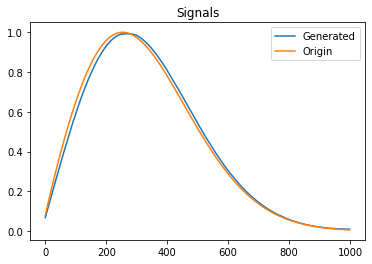

In [8]:
new_signal = generate_new_signal(model, dataset, samples_num=20)
plt.title("Signals")
plt.plot(new_signal)
plt.plot(dataset[np.random.choice(len(dataset))])
plt.legend(['Generated', 'Origin'])
plt.show()